<a href="https://colab.research.google.com/github/BossDever/Regression/blob/main/6404022630308_Assignment_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The housing dataset provided in the file housing.csv contains data on house prices and characteristics that we will use to build our regression models. Import this datafile in Google Colab and write python code as follows:

Exploring the Housing Dataset

• Describe the columns in the dataset (price, bedrooms, bathrooms, sqft_living, etc.)

• Use plots, tables, statistics to explore relationships between the variables. For example,
correlate price with sqft_living.

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression


In [ ]:
data = pd.read_csv("/content/housing.csv")
print("Dataset Information:")
data.head()


Dataset Information:


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_basement,lat,long
0,221900.0,3,1.00,1180,5650,1.0,0,3,7,0,47.5112,-122.257
1,538000.0,3,2.25,2570,7242,2.0,0,3,7,400,47.7210,-122.319
2,180000.0,2,1.00,770,10000,1.0,0,3,6,0,47.7379,-122.233
3,604000.0,4,3.00,1960,5000,1.0,0,5,7,910,47.5208,-122.393
4,510000.0,3,2.00,1680,8080,1.0,0,3,8,0,47.6168,-122.045


In [ ]:
print("\nDescription of Columns:")
data.columns


Description of Columns:


Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'sqft_basement', 'lat', 'long'],
      dtype='object')

In [ ]:
print("\nSummary Statistics:")
data.describe()



Summary Statistics:


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_basement,lat,long
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,3.409430,7.656873,291.509045,47.560053,-122.213896
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.650743,1.175459,442.575043,0.138564,0.140828
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,1.000000,1.000000,0.000000,47.155900,-122.519000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,0.000000,47.471000,-122.328000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,3.000000,7.000000,0.000000,47.571800,-122.230000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,4.000000,8.000000,560.000000,47.678000,-122.125000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,4820.000000,47.777600,-121.315000


In [ ]:
correlation = data.corr()
correlation

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_basement,lat,long
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.036362,0.667434,0.323816,0.307003,0.021626
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.028472,0.356967,0.303093,-0.008931,0.129473
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,-0.124982,0.664983,0.283770,0.024573,0.223042
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,-0.058753,0.762704,0.435043,0.052529,0.240223
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,-0.008958,0.113621,0.015286,-0.085683,0.229521
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,-0.263768,0.458183,-0.245705,0.049614,0.125419
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.016653,0.082775,0.080588,-0.014274,-0.041910
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,1.000000,-0.144674,0.174105,-0.014941,-0.106500
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,-0.144674,1.000000,0.168392,0.114084,0.198372
sqft_basement,0.323816,0.303093,0.283770,0.435043,0.015286,-0.245705,0.080588,0.174105,0.168392,1.000000,0.110538,-0.144765


In [ ]:
X = data[['sqft_living']]
y = data['price']

regr = LinearRegression()

regr.fit(X, y)



LinearRegression()

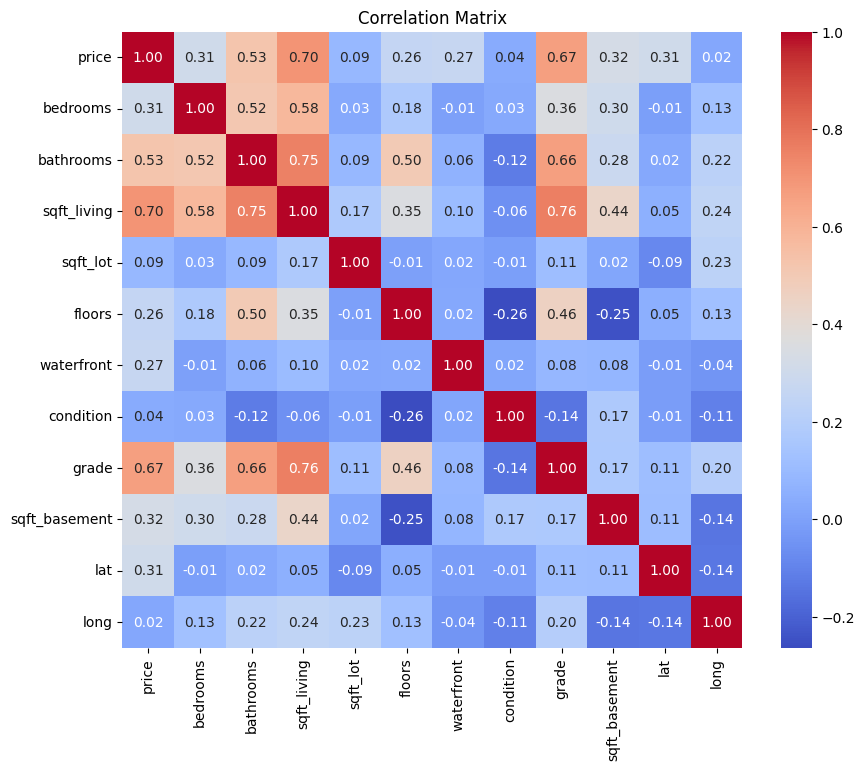

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

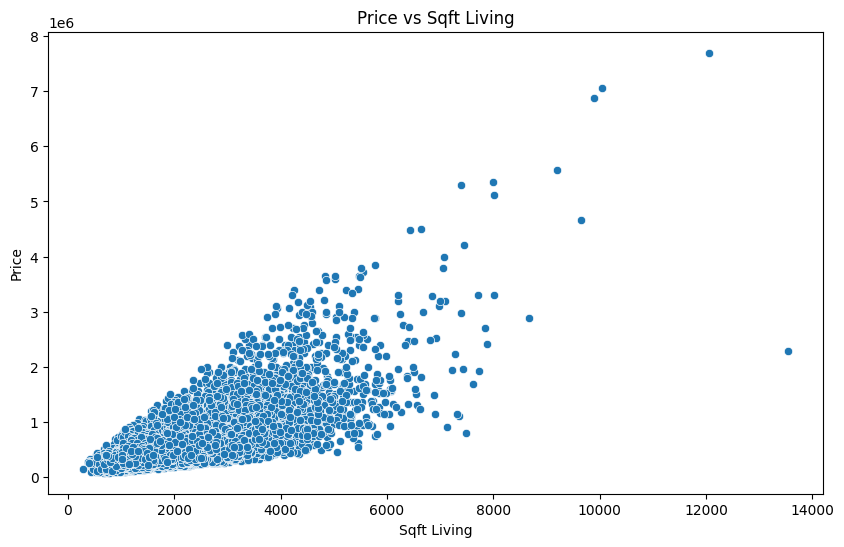

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_living', y='price', data=data)
plt.title('Price vs Sqft Living')
plt.xlabel('Sqft Living')
plt.ylabel('Price')
plt.show()

Building a Linear Regression Model

• Using price as the target variable, build a linear regression model with sqft_living as the only input

• Show the slope and intercept values

• Evaluate model accuracy using MSE, R-squared

Slope: 279.55477931526383
Intercept: -41999.18603993731
Mean Squared Error (MSE): 76484977061.77612
R-squared: 0.49406905389089006


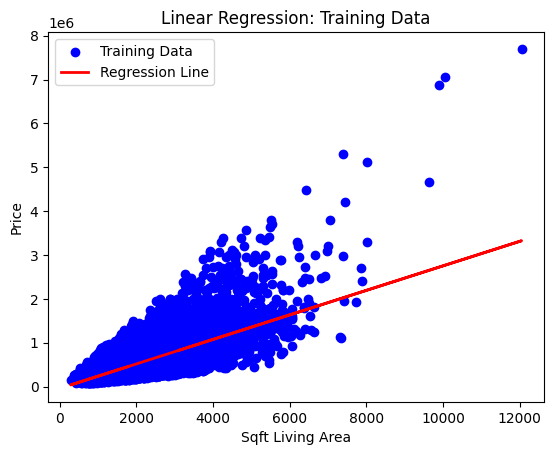

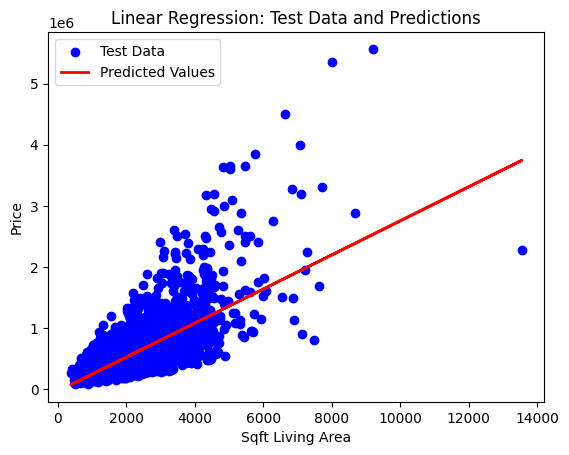

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df[['sqft_living']]  # Feature
y = df['price']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regr = LinearRegression()
regr.fit(X_train, y_train)

slope = regr.coef_[0]
intercept = regr.intercept_
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")

y_pred = regr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")
import matplotlib.pyplot as plt

plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.plot(X_train, regr.predict(X_train), color='red', linewidth=2, label='Regression Line')
plt.title('Linear Regression: Training Data')
plt.xlabel('Sqft Living Area')
plt.ylabel('Price')
plt.legend()
plt.show()

plt.scatter(X_test, y_test, color='blue', label='Test Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Values')
plt.title('Linear Regression: Test Data and Predictions')
plt.xlabel('Sqft Living Area')
plt.ylabel('Price')
plt.legend()
plt.show()


Improving the Model with Multiple Variables

• Try adding additional predictive variables like bedrooms, bathrooms

• Evaluate improvement in model accuracy

Intercept: 69884.2955837939
Coefficients: [   305.64613097 -56373.55481765  11296.92029198]
Mean Squared Error (MSE): 74237634953.1832
R-squared: 0.5089347172264876


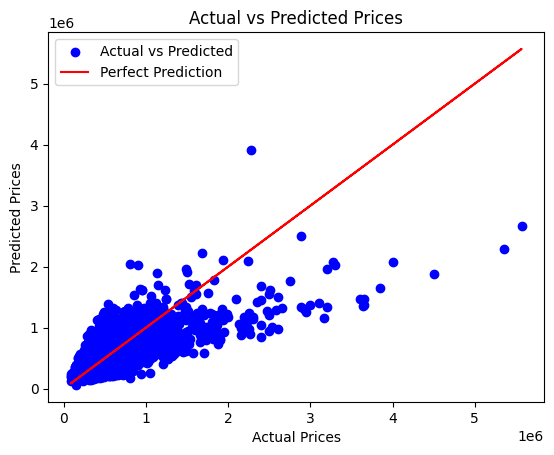

In [ ]:

X = df[['sqft_living', 'bedrooms', 'bathrooms']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regr = LinearRegression()
regr.fit(X_train, y_train)

intercept = regr.intercept_
coefficients = regr.coef_
print(f"Intercept: {intercept}")
print(f"Coefficients: {coefficients}")

y_pred = regr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")

plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot(y_test, y_test, color='red', label='Perfect Prediction')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.show()
